# Project Overview:

## Objective: 
#### This project involves web scraping and analyzing e-commerce data from a specific website.
## 1. Data Scraping: 
#### The primary goal is to gather comprehensive data about various products, including their names, prices, descriptions, star ratings, and URLs.
## 2. Programming Language:
#### Python is used as the primary programming language for web scraping, data preprocessing, and analysis.
## 3. Libraries: 
#### requests, BeautifulSoup, pandas, csv, matplotlib and seaborn.
## Data Processing: 
#### Data preprocessing includes cleaning and transformation tasks, such as removing unwanted characters and converting data types.
## Data Analysis: 
### Basic data analysis is performed, which includes generating summary statistics for price data and creating visualizations (histograms and scatter plots) to gain insights into the distribution of prices and the relationship between price and star ratings.

# 1. Data Scraping:


In [157]:
#Importing Libraries:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the URL to scrape
url = "https://webscraper.io/test-sites/e-commerce/allinone/phones/touch"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

items = soup.find_all('div', class_='col-sm-4 col-lg-4 col-md-4')

# Loop through each item and extract relevant information
data_list = []

# Loop through each item and extract relevant information
for article in items:
    price = article.find('h4', class_="pull-right price").get_text()
    name = article.find('a', class_='title').get_text()
    description = article.find('p', class_='description').get_text()
    stars = article.find('p', {'data-rating': True})  # Find the <p> element with a 'data-rating' attribute
    url = article.find('a', href=True)['href'] 


    
    # Append the data to the data_list
    data = [name, price, url, stars, description ]
    data_list.append(data)

# Define the header row for the CSV file
header = ['name', 'price', 'url', 'stars', 'description']

# Write the data to a CSV file named 'WebScraperDataset.csv'
with open('WebScraperDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data_list)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('WebScraperDataset.csv')

# Extract the numeric part of the 'stars' column
df['stars'] = df['stars'].str.extract(r'(\d+)')

df

,name,price,url,stars,description
0,Nokia 123,$24.99,/test-sites/e-commerce/allinone/product/486,3,7 day battery
1,LG Optimus,$57.99,/test-sites/e-commerce/allinone/product/487,3,"3.2"" screen"
2,Samsung Galaxy,$93.99,/test-sites/e-commerce/allinone/product/488,3,5 mpx. Android 5.0
3,Nokia X,$109.99,/test-sites/e-commerce/allinone/product/489,4,"Andoid, Jolla dualboot"
4,Sony Xperia,$118.99,/test-sites/e-commerce/allinone/product/490,1,"GPS, waterproof"
5,Ubuntu Edge,$499.99,/test-sites/e-commerce/allinone/product/491,1,Sapphire glass
6,Iphone,$899.99,/test-sites/e-commerce/allinone/product/492,1,White
7,Iphone,$899.99,/test-sites/e-commerce/allinone/product/493,2,Silver
8,Iphone,$899.99,/test-sites/e-commerce/allinone/product/494,1,Black


 ### - We successfully scrape e-commerce data from the provided URL and store it in a CSV file and DataFrame for further analysis. 

# 2. Data preprocessing:



In [166]:
df = pd.read_csv('WebScraperDataset.csv')

# Remove the '$' symbol from the 'price' column and convert it to a floating-point number
df['price'] = df['price'].str.replace('$', '').astype(float)

# Display the first few rows of the DataFrame to inspect the changes
df.head()

,name,price,url,stars,description
0,Nokia 123,24.99,/test-sites/e-commerce/allinone/product/486,"<p data-rating=""3"">\n<span class=""ws-icon ws-i...",7 day battery
1,LG Optimus,57.99,/test-sites/e-commerce/allinone/product/487,"<p data-rating=""3"">\n<span class=""ws-icon ws-i...","3.2"" screen"
2,Samsung Galaxy,93.99,/test-sites/e-commerce/allinone/product/488,"<p data-rating=""3"">\n<span class=""ws-icon ws-i...",5 mpx. Android 5.0
3,Nokia X,109.99,/test-sites/e-commerce/allinone/product/489,"<p data-rating=""4"">\n<span class=""ws-icon ws-i...","Andoid, Jolla dualboot"
4,Sony Xperia,118.99,/test-sites/e-commerce/allinone/product/490,"<p data-rating=""1"">\n<span class=""ws-icon ws-i...","GPS, waterproof"


In [167]:
# Display concise information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9 non-null      object 
 1   price        9 non-null      float64
 2   url          9 non-null      object 
 3   stars        9 non-null      object 
 4   description  9 non-null      object 
dtypes: float64(1), object(4)
memory usage: 492.0+ bytes


In [163]:
# Display concise description about the DataFrame
df.describe()

,price
count,9.000000
mean,400.656667
std,399.105562
min,24.990000
25%,93.990000
50%,118.990000
75%,899.990000
max,899.990000


In [164]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()


name           0
price          0
url            0
stars          0
description    0
dtype: int64

### I have properly processed and cleaned the data, which will significantly improve the accuracy and reliability of my analytical results.

# 3. Data Analysis:

In [114]:
# Count the occurrences of each unique value in the 'price' column
df['price'].value_counts()


price
899.99    3
24.99     1
57.99     1
93.99     1
109.99    1
118.99    1
499.99    1
Name: count, dtype: int64

In [134]:
# Calculate and print summary statistics for the 'price' column
price_stats = df['price'].describe()
print(price_stats)

count      9.000000
mean     400.656667
std      399.105562
min       24.990000
25%       93.990000
50%      118.990000
75%      899.990000
max      899.990000
Name: price, dtype: float64


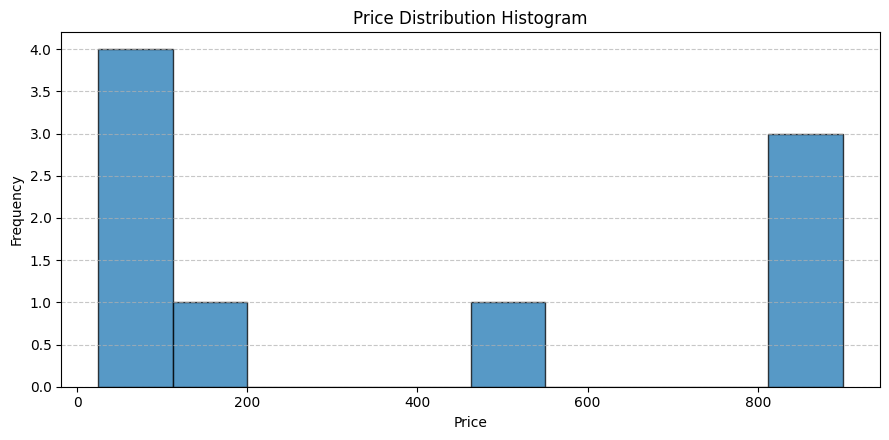

In [165]:
# Creating a histogram of the 'price' column
plt.figure(figsize=(9, 4.5))
plt.hist(df['price'], bins=10, edgecolor='k', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### - the majority of products fall within the 0-200 price range, with fewer products in the 400-600 range,   and three relatively higher-priced products above 800.

In [140]:
# Count the occurrences of each unique value in the 'stars' column
df['stars'].value_counts()

stars
1    4
3    3
4    1
2    1
Name: count, dtype: int64

In [139]:
# Calculate and print summary statistics for the 'stars' column
price_stats = df['stars'].describe()
print(price_stats)

count     9
unique    4
top       1
freq      4
Name: stars, dtype: object


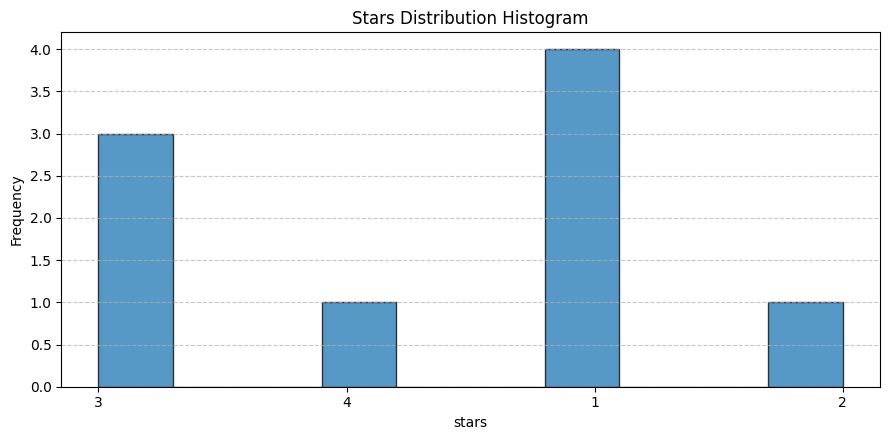

In [138]:
# Creating a histogram of the 'stars' column
plt.figure(figsize=(9, 4.5))
plt.hist(df['stars'], bins=10, edgecolor='k', alpha=0.75)
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.title('Stars Distribution Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### - The majority of products have a 1-star rating.
### - There are fewer products with 4 and 2 stars ratings.
### - There are three products with 3 stars .

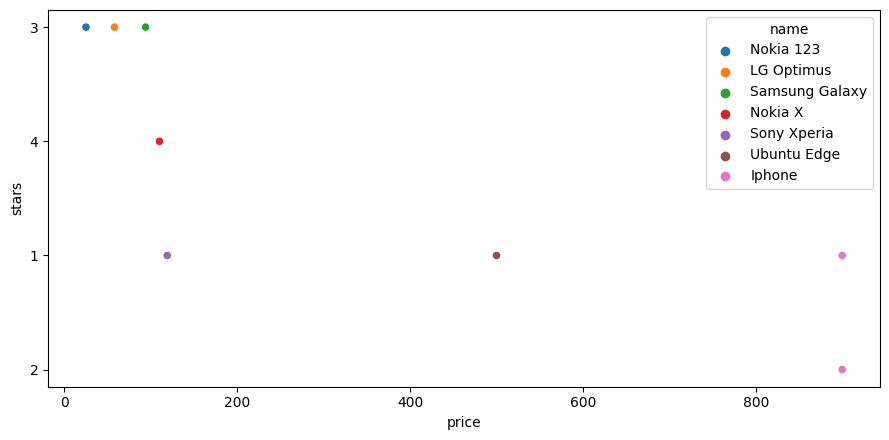

In [154]:
# Create a scatter plot to visualize the relationship between 'price' and 'stars' with 'name' as the differentiator
sns.scatterplot(x = df['price'], y =df['stars'], hue=df["name"])
plt.show()

### - While products in the lower price range (0-200) have a mix of star ratings (1 star, 3 stars, and 4 stars), the product in the mid-price range (400-600) has a lower star rating (1 star). The products with prices above 800 have a mix of star ratings (1 star and 2 stars).

# ---------------------------------------------------------------------

### In summary, the analysis of products based on price ranges and star ratings has provided valuable insights into customer preferences and satisfaction levels. It is evident that customers have varying experiences across different price categories. In the lower price range (0-200), we observe a wide spectrum of star ratings, with a notable 4-star-rated product indicating strong value for money.

### However, the mid-price range (400-600) presents a unique challenge, with a single product receiving only 1 star, raising concerns about its quality and value proposition. Additionally, in the high-end segment (above 800), we find variability in star ratings, underscoring the importance of consistently delivering quality and customer satisfaction even in premium-priced products.

### To gain deeper insights and address these findings effectively, it is crucial to dive into customer feedback and reviews for each product category. This qualitative analysis can uncover specific strengths and weaknesses, guiding improvements and refinements.

### Furthermore, aligning pricing strategies with the perceived value of products in each category is a strategic move. It can enhance product offerings, optimize pricing competitiveness, and ultimately lead to a more satisfied customer base.

### In conclusion, this analysis not only sheds light on the current state of the product offerings but also paves the way for data-driven decisions aimed at improving customer satisfaction and market competitiveness.